# Миссия повышения уровня благополучия детей по всему миру

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [425]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 1. Первичная обработка данных

In [426]:
# проверка данных на наличие неизвестных столбцов в рассматриваемой выборке и удаление
columns_dataset = ('school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
                   'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
                   'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
                   'freetime', 'goout', 'health', 'absences', 'score')
for i in range(0, len(columns_dataset)):
    if stud_math.columns[i] not in columns_dataset:
        delete_columns = stud_math.columns[i]
        # удаление столбца
        stud_math.drop([delete_columns], inplace=True, axis=1)


# изменение наименований столбцов
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                     'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                     'health', 'absences', 'score']


# функция для установки корректных типов данных (строка)
def change_type(x):
    for letter in stud_math_type:
        stud_math[letter] = stud_math[letter].astype('str')
        stud_math[letter] = stud_math[letter].str.split('.', expand=True)


# функция просмотра информации о столбце
def review_info_col(col):
    print("Значений, встретившихся в столбце более 10 раз:",
          (stud_math[col].value_counts() > 10).sum())
    print("Уникальных значений:", stud_math[col].nunique())
    display(pd.DataFrame(stud_math[col].value_counts()))
    stud_math.loc[:, [col]].info()


# функция интерполяции для заполнения пропущенных значений для количественных переменных
def change_nan(value):
    stud_math[value] = stud_math[value].fillna(stud_math[value].interpolate())


# функция для заполнения пропущенных значений для номинативных переменных
def change_nan_categor(value):
    for letter in value:
        for letter in stud_math.select_dtypes(include=['object']):
            stud_math[letter] = stud_math[letter].where(
                (pd.notnull(stud_math[letter])), None)


# функция теста Стьюдента
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


# функция для поиска выбросов           
def blowout(value):
    median = stud_math[value].median()
    IQR = stud_math[value].quantile(0.75) - stud_math[value].quantile(0.25)
    perc25 = stud_math[value].quantile(0.25)
    perc75 = stud_math[value].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud_math[value].loc[stud_math[value].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(40, 100),
                                                                                            label='IQR')
    stud_math[value].loc[stud_math[value] <= 100].hist(alpha=0.5, bins=16, range=(40, 100),
                                                       label='Здравый смысл')

    plt.legend()


# проверяем наличие дублирующих строк в датасете
(stud_math.duplicated()).value_counts()

False    395
dtype: int64

In [427]:
# в соответствии с представленной информацией дублирующих строк в датасете нет

In [428]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

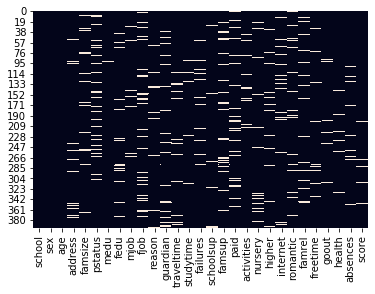

In [429]:
sns.heatmap(stud_math.isnull(), cbar=False) #визуализируем каждый столбец данных для отображения пустых значений

In [430]:
stud_math.isnull().sum() #выведем сумму пустых значений

school         0
sex            0
age            0
address       17
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [431]:
# определим количественные переменные для замены пустых значений функцией интерполяции
stud_math_change_nan = ('medu', 'fedu', 'traveltime', 'studytime', 'failures',
                        'famrel', 'freetime', 'goout', 'health', 'absences', 'score')
for letter in stud_math_change_nan:
    change_nan(letter)

In [432]:
# из представленного описания к выборке, делаем вывод, что следующие переменные должны являться номинативными
# проведем преобразование
stud_math_type = ('medu', 'fedu', 'traveltime', 'studytime',
                  'famrel', 'freetime', 'goout', 'health', 'failures')
change_type(stud_math_type)

In [433]:
# рассмотрим номинативные переменные
for letter in stud_math.select_dtypes(include=['object']):
    print(review_info_col(letter))

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5


,medu
4,132
2,102
3,98
1,60
0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   medu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,fedu
2,113
3,104
4,88
1,87
0,2
40,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fedu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3


,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4


,traveltime
1,262
2,104
3,22
4,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   traveltime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,studytime
2,201
1,103
3,64
4,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   studytime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,failures
0,312
1,51
2,17
3,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   failures  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,famrel
4,196
5,105
3,69
2,17
1,7
-1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,freetime
3,161
4,114
2,63
5,38
1,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   freetime  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,goout
3,128
2,105
4,85
5,53
1,24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   goout   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,health
5,139
3,95
4,66
1,48
2,47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
None


In [434]:
change_nan_categor(stud_math.columns) # заменим пустые значения на None

In [435]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        395 non-null    object 
 7   fedu        395 non-null    object 
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  395 non-null    object 
 13  studytime   395 non-null    object 
 14  failures    395 non-null    object 
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

# 2. Распределение признака для числовых переменных, устранение выбросов

Text(0.5, 1.0, 'Баллы по математике (score)')

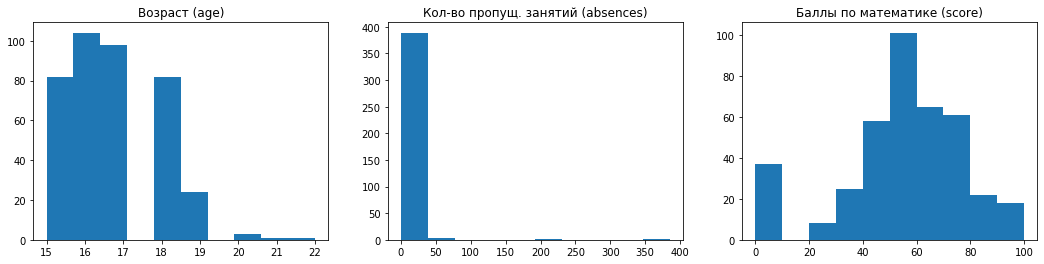

In [436]:
# таким образом у нас только 4 числовые переменные 'age', 'failures', 'absences', 'score'
# рассмотрим каждое из них
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].hist(stud_math['age'])
axes[0].set_title('Возраст (age)')

axes[1].hist(stud_math['absences'])
axes[1].set_title('Кол-во пропущ. занятий (absences)')

axes[2].hist(stud_math['score'])
axes[2].set_title('Баллы по математике (score)')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


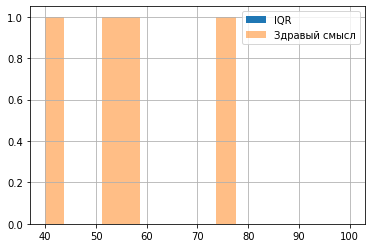

In [437]:
blowout('absences')

In [438]:
# в нашем случае формула интерквартильного расстояния (межквартильного размаха) не сработала
# посмотрим отдельно на строки с представленными значениями
stud_math.query('absences > 150')

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2,3,services,teacher,other,mother,1,2,0,yes,None,no,no,yes,yes,yes,no,2,3,1,3,385.0,85.0
390,MS,M,20,U,LE3,A,2,2,services,services,course,None,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,212.0,45.0


In [439]:
# в данном случае наблюдается либо ошибка в данных либо частные случаи при которых посещение школы стало невозможным
# возможно в данном случае речь идет именно о посещении школы, без учета учебы на дому
# исключим данные строки

In [440]:
stud_math = stud_math.loc[stud_math.absences <= 150]

# 3. Оценка количества уникальных значений для номинативных переменных

In [441]:
# в раннем рассмотрении номинативных переменных 2 переменные вызвали ряд вопросов, рассмотрим их поближе
review_info_col('fedu')
review_info_col('famrel')

Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,fedu
2,112
3,103
4,88
1,87
0,2
40,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fedu    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,famrel
4,196
5,104
3,69
2,16
1,7
-1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


<Figure size 360x360 with 0 Axes>

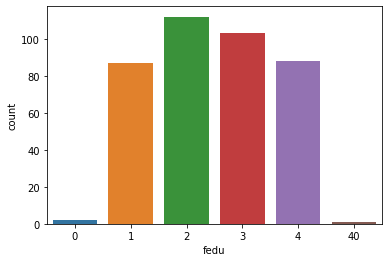

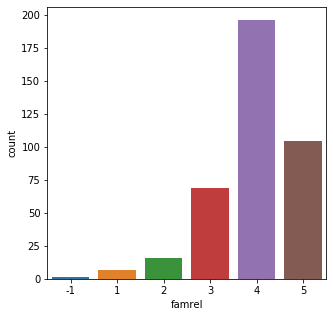

<Figure size 360x360 with 0 Axes>

In [442]:
# на основании представленных данных можно сделать вывод о том, что значения в столбцах 'fedu' и 'famrel' не допустимы
sns.countplot(x='fedu', data=stud_math)
plt.figure(figsize=(5, 5))
sns.countplot(x='famrel', data=stud_math)
plt.figure(figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

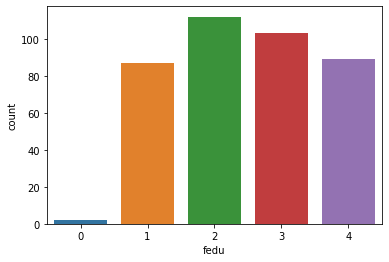

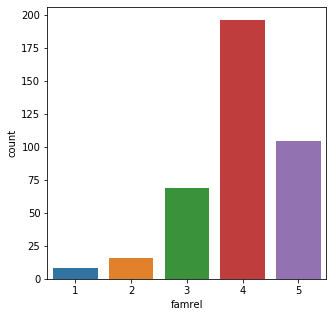

<Figure size 360x360 with 0 Axes>

In [443]:
# делаем замену недопустимых значений. Проверяем
stud_math['fedu'] = np.where(stud_math['fedu'] == '40', '4', stud_math['fedu'])
stud_math['famrel'] = np.where(stud_math['famrel'] == '-1', '1', stud_math['famrel'])
stud_math['fedu'] = stud_math['fedu'].astype('category')
stud_math['famrel'] = stud_math['famrel'].astype('category')

sns.countplot(x='fedu', data=stud_math)
plt.figure(figsize=(5, 5))
sns.countplot(x='famrel', data=stud_math)
plt.figure(figsize=(5, 5))

# 5. Корреляционный анализ количественных переменных

Выясним, какие столбцы коррелируют с баллы по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для количественных столбцов.

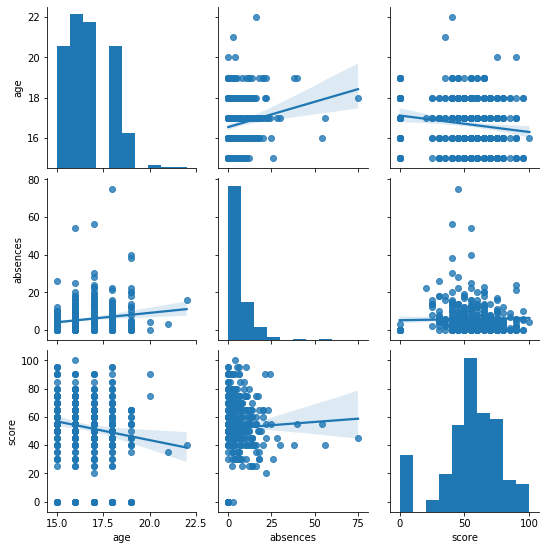

In [444]:
sns.pairplot(stud_math[['age', 'absences', 'score']], kind = 'reg')

In [445]:
# используем матрицу корреляций
stud_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.158297,-0.147396
absences,0.158297,1.000000,0.032349
score,-0.147396,0.032349,1.000000


In [446]:
# из матрицы корреляций видно две скоррелированные с переменные: age и absences.

# 7. Анализ номинативных переменных

In [447]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 3))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

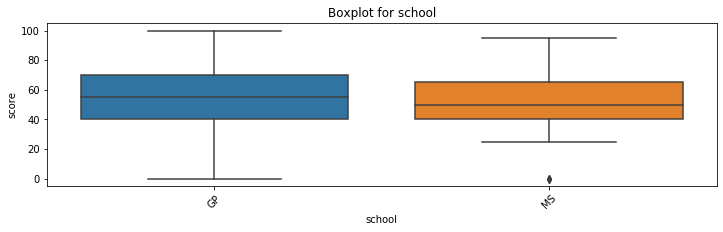

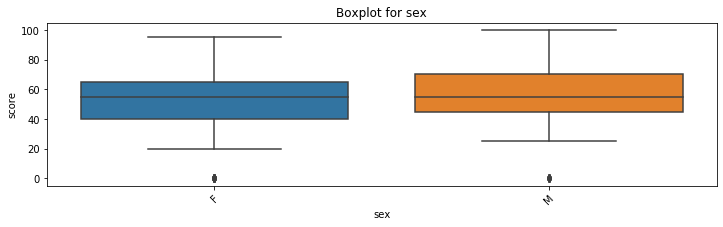

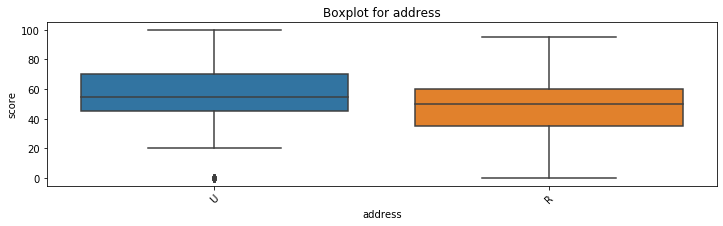

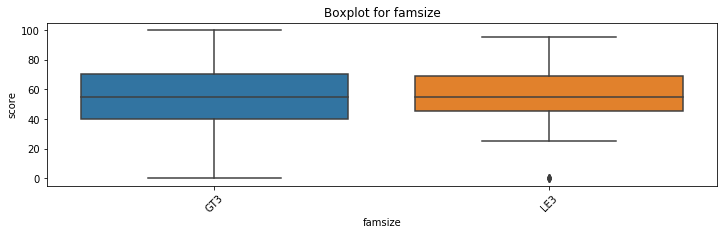

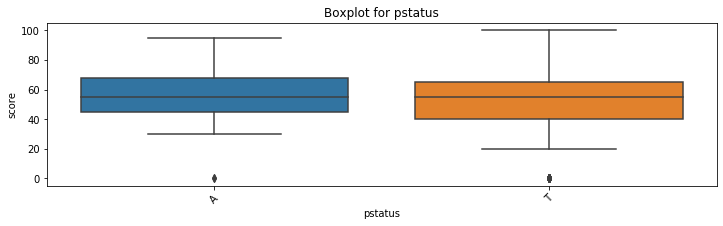

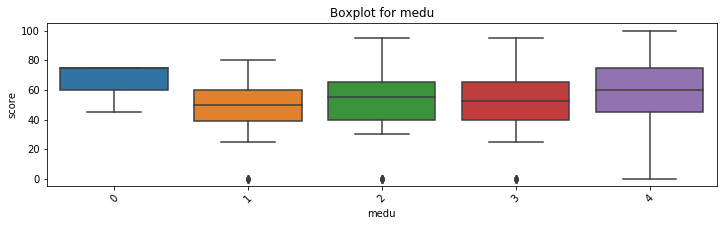

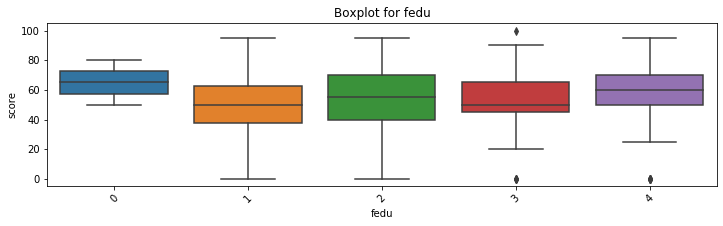

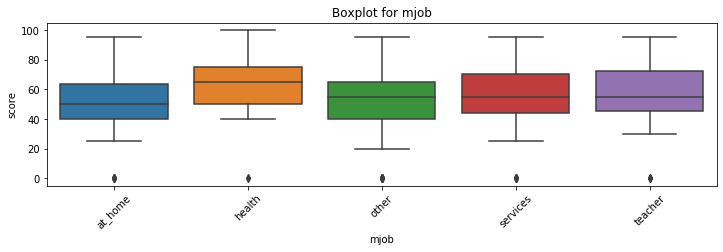

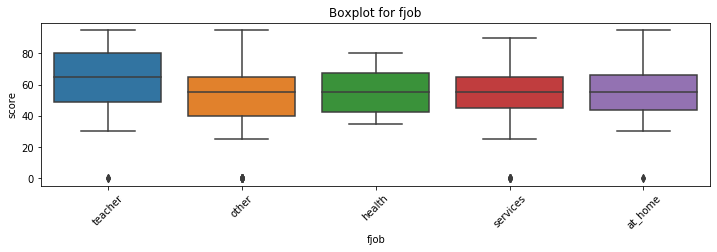

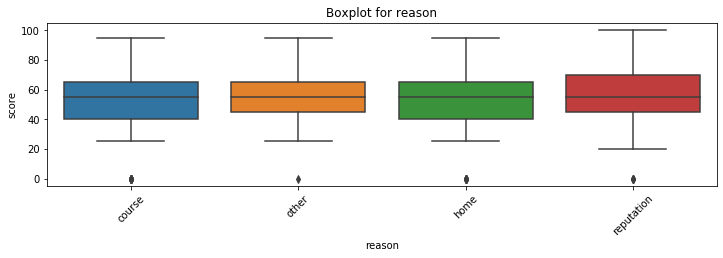

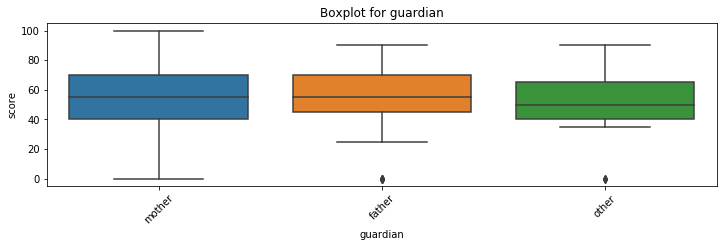

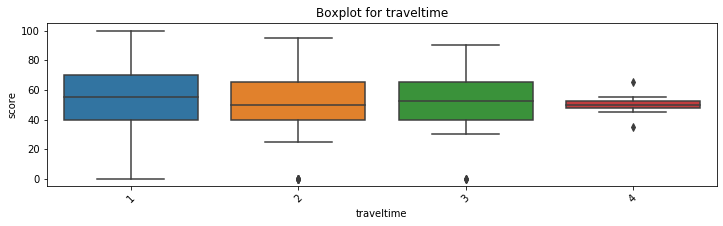

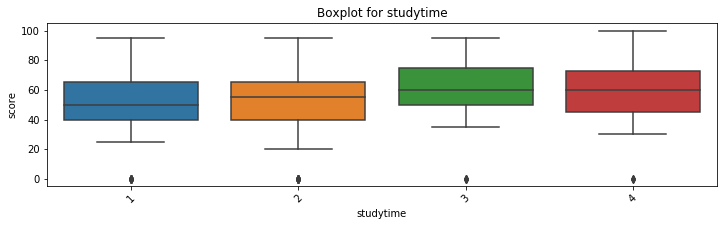

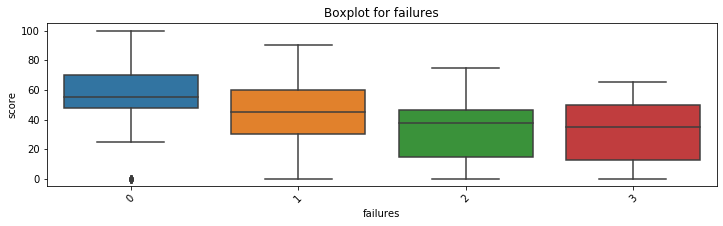

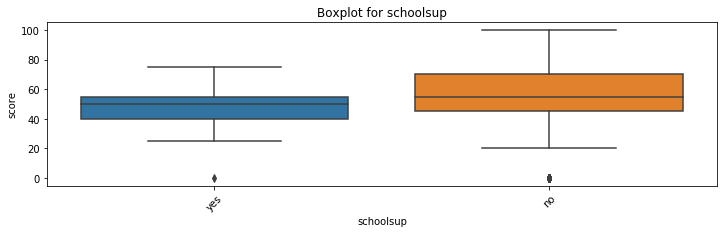

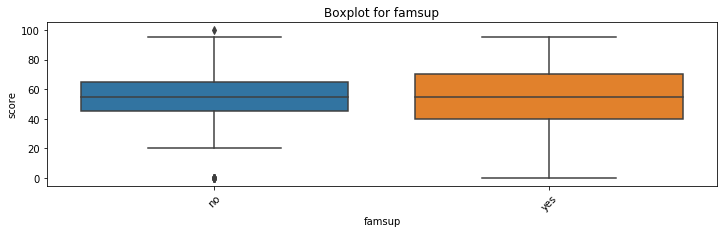

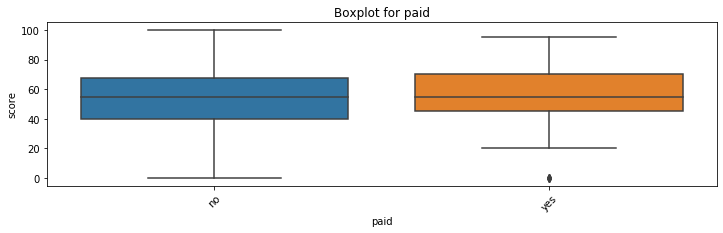

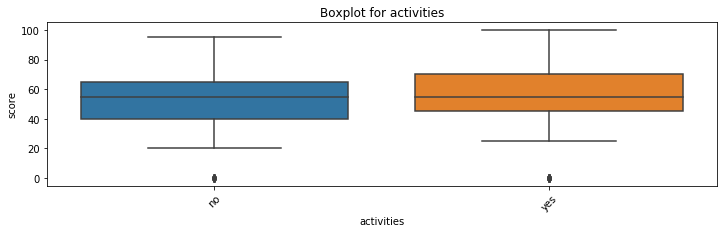

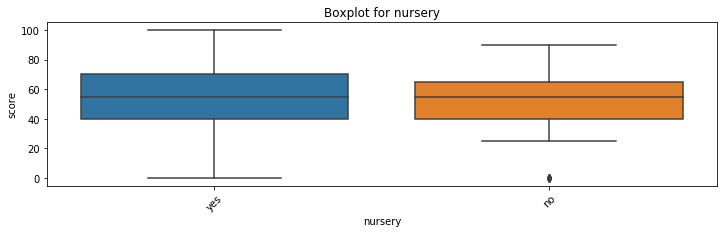

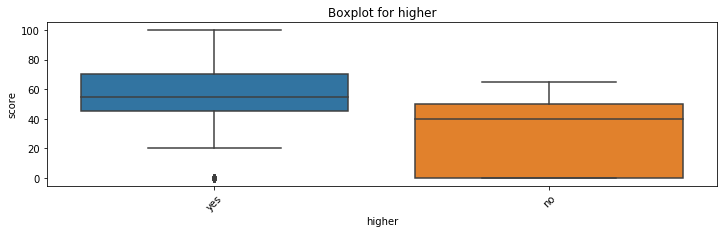

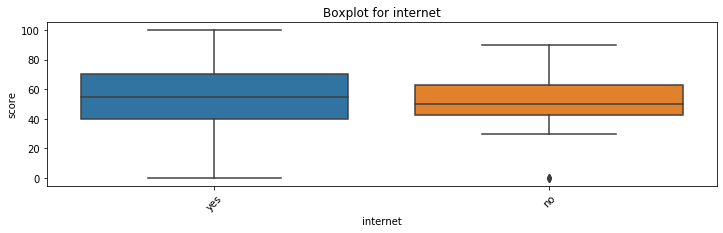

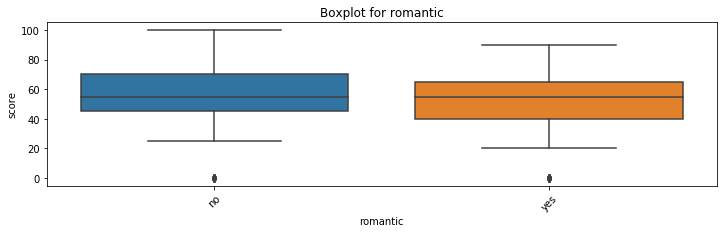

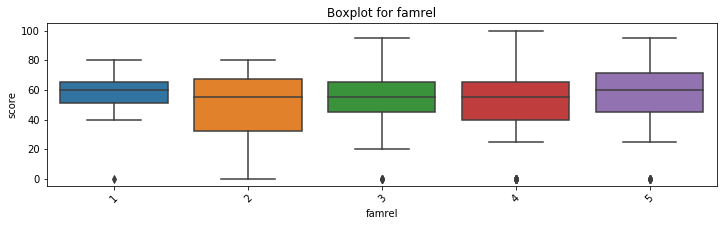

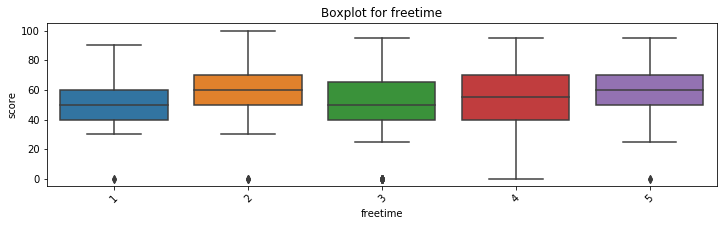

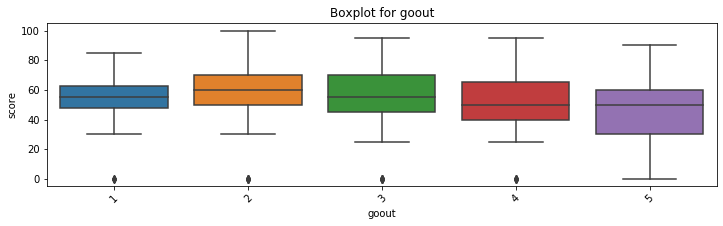

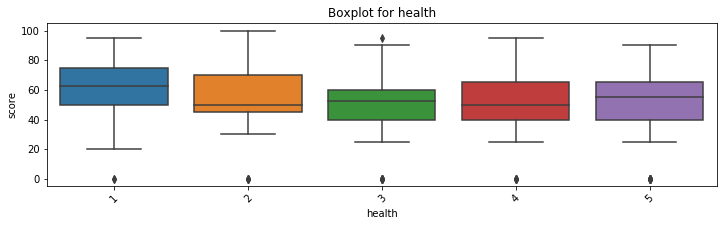

In [448]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures','schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_boxplot(col)

на первый взгляд можно предположить, что на оценку влияет место жительства, полноценная семья, образование родителей, желание получить высшее образование, наличие интернета, отсутствие романтических отношений и конечно прогулов. Не влияет: причина выбора школы/ семейная образовательная поддержка/ дополнительные платные занятия по математике/ дополнительная образовательная поддержка

так как графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы воспользовавшись функцией **get_stat_difget_stat_dif**:

In [449]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются 7 параметров: sex, address, medu, mjob, failures, higher, romantic, goout. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, medu, mjob, failures, higher, romantic, goout, age и absences.

In [450]:
study_for_model = stud_math.loc[:, ['sex', 'address', 'medu', 'mjob',
                                    'failures', 'higher', 'romantic', 'goout', 'age', 'absences']]
study_for_model.head()

,sex,address,medu,mjob,failures,higher,romantic,goout,age,absences
0,F,U,4,at_home,0,yes,no,4,18,6.0
1,F,U,1,at_home,0,yes,no,3,17,4.0
2,F,U,1,at_home,3,yes,None,2,15,10.0
3,F,U,4,health,0,yes,yes,2,15,2.0
4,F,U,3,other,0,yes,no,2,16,4.0
